<a href="https://colab.research.google.com/github/Get-the-CODE/Machine-Learning-codes/blob/main/AML_21June_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_table('http://cs.joensuu.fi/sipu/datasets/spiral.txt', header=None,sep='\t')

In [2]:
!wget http://cs.joesuu.fi/sipu/datasets/spiral.txt

--2024-06-24 09:38:07--  http://cs.joesuu.fi/sipu/datasets/spiral.txt
Resolving cs.joesuu.fi (cs.joesuu.fi)... failed: Name or service not known.
wget: unable to resolve host address ‘cs.joesuu.fi’


In [3]:
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

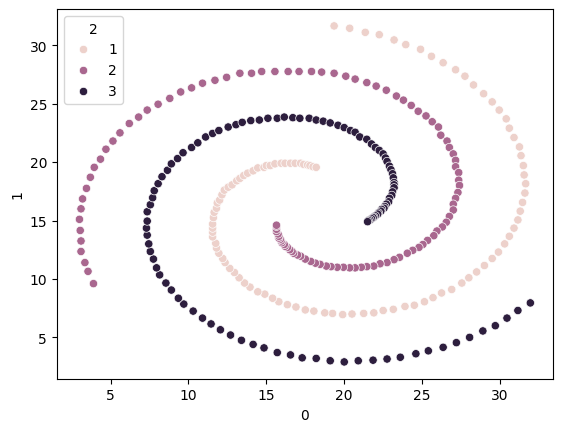

In [4]:
sns.scatterplot(x = data.iloc[:,0], y=data.iloc[:,1], hue=data.iloc[:,2])

In [5]:
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

In [6]:
scaled_data= StandardScaler().fit_transform(data.iloc[:,:2])

In [7]:
dist_mat = pairwise_distances(scaled_data)

In [8]:
import matplotlib.pyplot as plt

<Axes: ylabel='Count'>

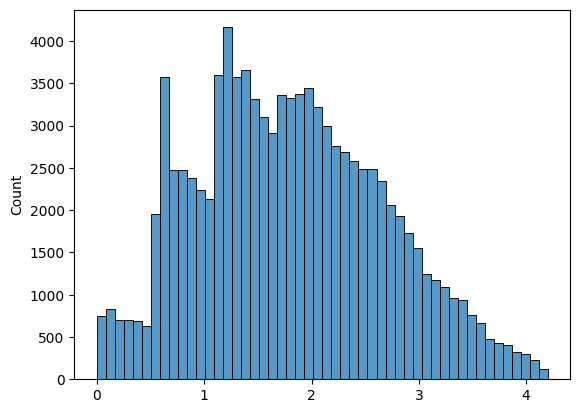

In [9]:
sns.histplot(dist_mat.flatten(), bins=50)

<ipython-input-10-d78f1bc3215f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dist_mat.flatten())


<Axes: ylabel='Density'>

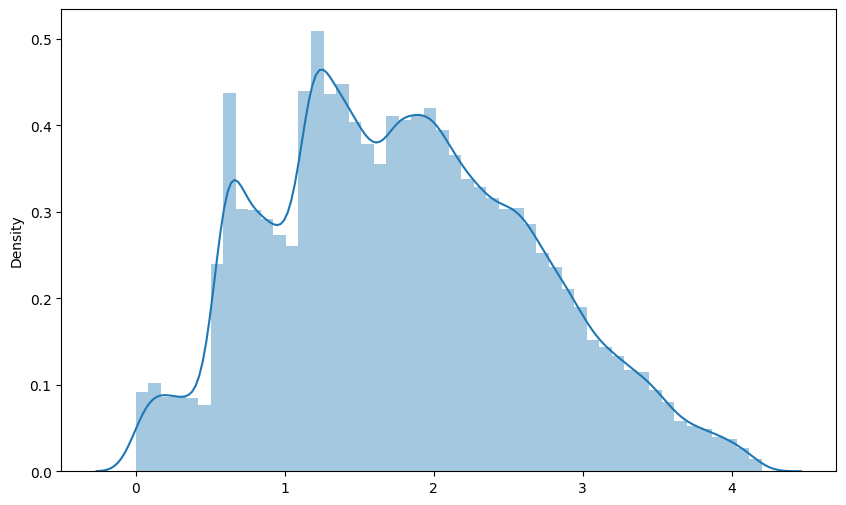

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(dist_mat.flatten())

In [11]:
from scipy.stats import gaussian_kde
import numpy as np

In [12]:
kde = gaussian_kde(dist_mat.flatten())

In [13]:
input_array = np.linspace(start=0, stop=0.3, num=300)

In [14]:
density_vals = kde(input_array)

In [15]:
eps = input_array[density_vals==max(density_vals)]
eps

array([0.19464883])

In [17]:
dist_mat<=eps

array([[ True,  True, False, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

In [19]:
pts = (dist_mat<=eps).sum(axis=0)

In [20]:
pts

array([ 2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        4,  3,  4,  4,  3,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  5,  5,
        6,  6,  6,  6,  6,  7,  7,  6,  7,  7,  7,  7,  7,  7,  8,  8,  8,
        8,  9,  9,  9, 10, 11, 12, 13, 14, 15, 15, 16, 15, 15, 14, 14, 13,
       13, 12, 11, 10,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  4,  3,  4,  4,  4,  5,  5,  5,  4,  5,  4,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  6,  6,  6,  6,  6,  7,  6,  6,  7,  7,  7,  7,  7,  7,
        8,  7,  7,  8,  9,  8,  9,  9,  9,  9,  9, 10, 10, 11, 10,  9,  8,
        8,  7,  7,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

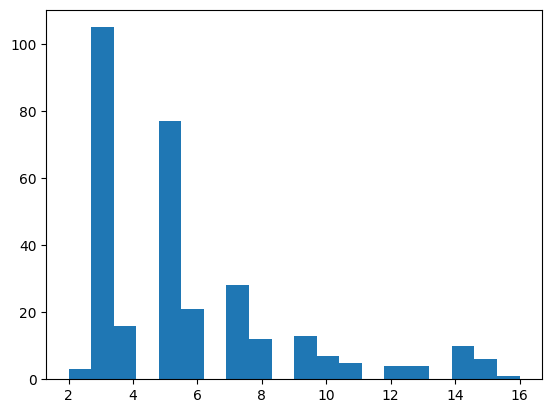

In [21]:
h=plt.hist(pts,bins=20)

In [22]:
minpts=2

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
dbs = DBSCAN(eps=eps[0], min_samples=minpts)

In [25]:
dbs_cluster = dbs.fit_predict(scaled_data)

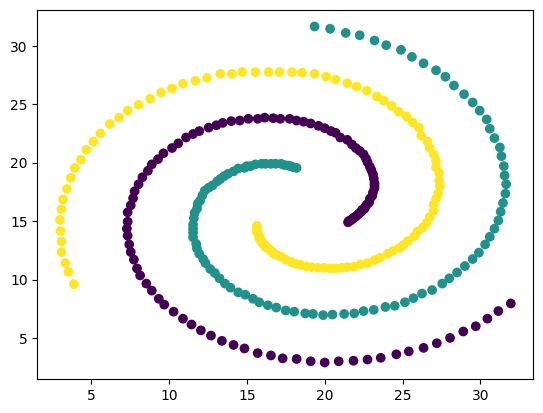

In [26]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=dbs_cluster)

In [27]:
!wget https://archive.ics.uci.edu/static/public/292/wholesale+customers.zip

--2024-06-24 09:53:55--  https://archive.ics.uci.edu/static/public/292/wholesale+customers.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wholesale+customers.zip’

wholesale+customers     [ <=>                ]  14.82K  --.-KB/s    in 0.04s   

2024-06-24 09:53:55 (389 KB/s) - ‘wholesale+customers.zip’ saved [15175]



In [28]:
!unzip wholesale+customers.zip

Archive:  wholesale+customers.zip
 extracting: Wholesale customers data.csv  


In [31]:
import pandas as pd

customers = pd.read_csv('/content/Wholesale customers data.csv')
print(customers.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [34]:
customers2 = customers.drop(columns=['Channel','Region'])

In [35]:
customers2.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


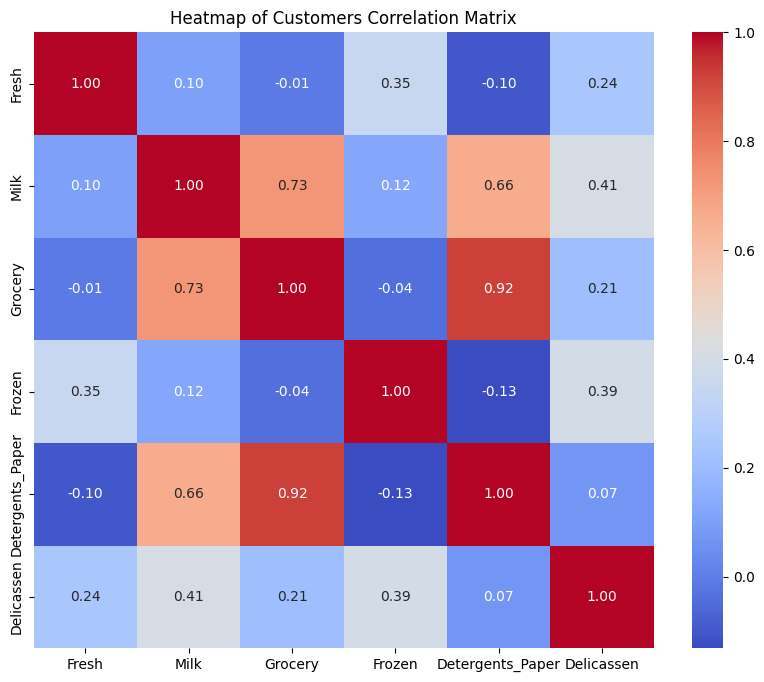

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = customers2.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Customers Correlation Matrix')
plt.show()


In [37]:
customers2.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

PCA1 explained variance: 0.4408
Cumulative explained variance up to PCA1: 0.4408
PCA2 explained variance: 0.2838
Cumulative explained variance up to PCA2: 0.7246
PCA3 explained variance: 0.1233
Cumulative explained variance up to PCA3: 0.8479
PCA4 explained variance: 0.0940
Cumulative explained variance up to PCA4: 0.9419
PCA5 explained variance: 0.0476
Cumulative explained variance up to PCA5: 0.9895
PCA6 explained variance: 0.0105
Cumulative explained variance up to PCA6: 1.0000


<ipython-input-38-d2022af6153c>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f'PCA{i+1}' for i in range(len(features))], y=explained_variance, palette='viridis')


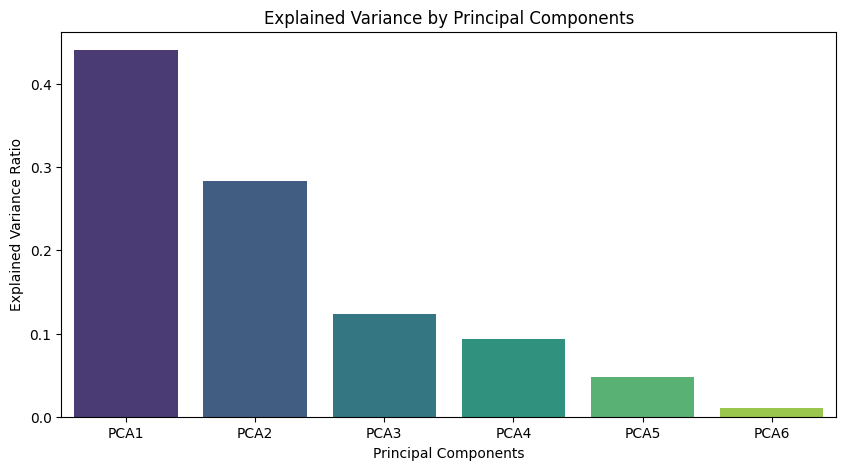

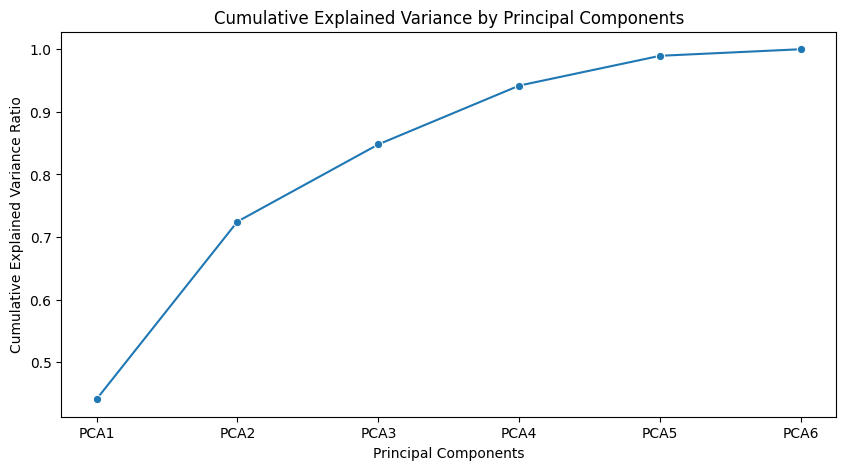

In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
customers2 = pd.read_csv('/content/Wholesale customers data.csv')

# Select the columns for PCA
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data = customers2[features]

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Perform PCA
pca = PCA(n_components=len(features))
pca_result = pca.fit_transform(data_standardized)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()

# Print explained variance
for i, variance in enumerate(explained_variance):
    print(f'PCA{i+1} explained variance: {variance:.4f}')
    print(f'Cumulative explained variance up to PCA{i+1}: {cumulative_explained_variance[i]:.4f}')

# Plot explained variance
plt.figure(figsize=(10, 5))
sns.barplot(x=[f'PCA{i+1}' for i in range(len(features))], y=explained_variance, palette='viridis')
plt.title('Explained Variance by Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.show()

# Plot cumulative explained variance
plt.figure(figsize=(10, 5))
sns.lineplot(x=[f'PCA{i+1}' for i in range(len(features))], y=cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.show()


PCA1 explained variance: 0.4408
Cumulative explained variance up to PCA1: 0.4408
PCA2 explained variance: 0.2838
Cumulative explained variance up to PCA2: 0.7246
PCA3 explained variance: 0.1233
Cumulative explained variance up to PCA3: 0.8479
PCA4 explained variance: 0.0940
Cumulative explained variance up to PCA4: 0.9419
PCA5 explained variance: 0.0476
Cumulative explained variance up to PCA5: 0.9895
PCA6 explained variance: 0.0105
Cumulative explained variance up to PCA6: 1.0000


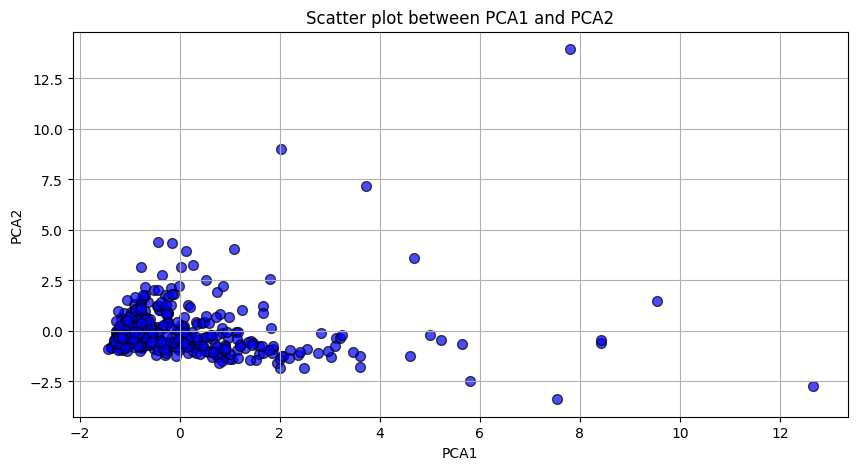

In [42]:
# Select the columns for PCA
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data = customers2[features]

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Perform PCA
pca = PCA(n_components=len(features))
pca_result = pca.fit_transform(data_standardized)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()

# Print explained variance
for i, variance in enumerate(explained_variance):
    print(f'PCA{i+1} explained variance: {variance:.4f}')
    print(f'Cumulative explained variance up to PCA{i+1}: {cumulative_explained_variance[i]:.4f}')


# Scatter plot between PCA1 and PCA2
plt.figure(figsize=(10, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolor='k', s=50, alpha=0.7)
plt.title('Scatter plot between PCA1 and PCA2')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()


In [43]:
pca = PCA(n_components = 3)

In [44]:
pca_mat = pca.fit_transform(data_standardized)

In [45]:
pca.explained_variance_ratio_.sum()

0.8479370530453146

In [51]:
pca_mat[:, [0,1,2]]

array([[ 0.19329055, -0.30509996, -0.14087845],
       [ 0.4344199 , -0.32841262,  0.31900662],
       [ 0.81114323,  0.8150957 ,  1.52341562],
       ...,
       [ 3.46570362, -1.03983801, -0.71316141],
       [-0.91802273, -0.03004659,  0.25840805],
       [-1.10513709, -0.86133787,  0.30515404]])

In [52]:
type(pca_mat)

numpy.ndarray

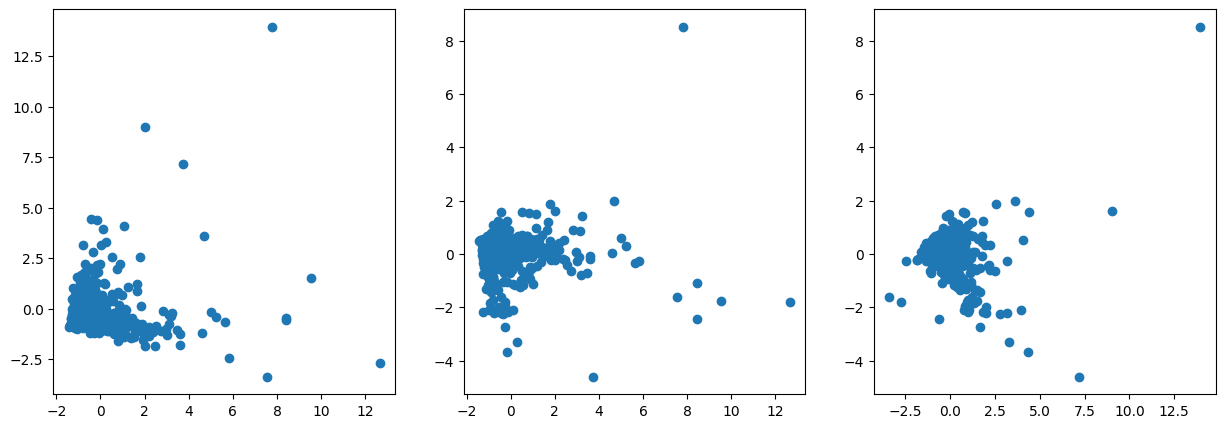

In [46]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(pca_mat[:,0], pca_mat[:,1])
plt.subplot(1,3,2)
plt.scatter(pca_mat[:,0], pca_mat[:,2])
plt.subplot(1,3,3)
plt.scatter(pca_mat[:,1], pca_mat[:,2])

scaled data --> pairwise distances --> distplot (check for first max) --> train gaussian KDE --> dist_mat < epsilon --> locate first maxima value for distance --> fit KDE model to linspace --> sum(axis=0) -->plot hist --> locate first point of gradual upward movement.

In [54]:
scaled_data = data_standardized
dist_mat = pairwise_distances(scaled_data)

<Axes: ylabel='Count'>

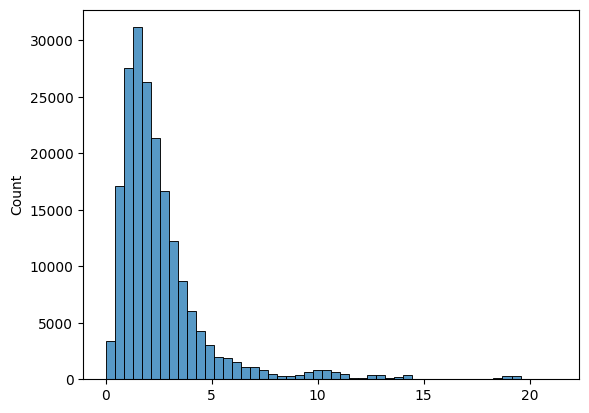

In [55]:
sns.histplot(dist_mat.flatten(), bins=50)

<ipython-input-56-d78f1bc3215f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dist_mat.flatten())


<Axes: ylabel='Density'>

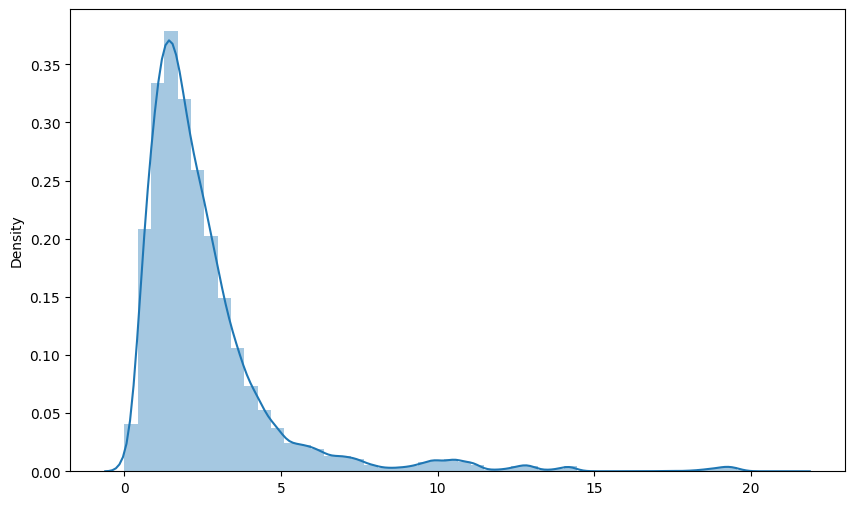

In [56]:
plt.figure(figsize=(10,6))
sns.distplot(dist_mat.flatten())

In [59]:
kde = gaussian_kde(dist_mat.flatten())
input_array = np.linspace(start=0, stop=2.5, num=300)
density_vals = kde(input_array)
eps = input_array[density_vals==max(density_vals)]
eps

array([1.42976589])

In [60]:
dist_mat<=eps

array([[ True,  True, False, ..., False,  True, False],
       [ True,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [ True, False, False, ..., False,  True,  True],
       [False, False, False, ..., False,  True,  True]])

In [61]:
pts = (dist_mat<=eps).sum(axis=0)

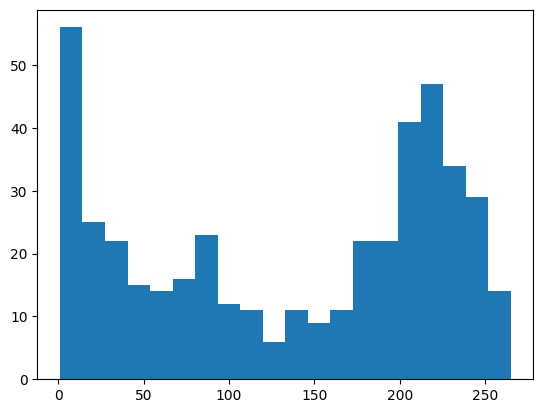

In [62]:
h=plt.hist(pts,bins=20)

In [63]:
minpts = 125

In [64]:
from sklearn.cluster import DBSCAN

In [65]:
dbs = DBSCAN(eps=eps[0], min_samples=minpts)

In [66]:
dbs_cluster = dbs.fit_predict(scaled_data)

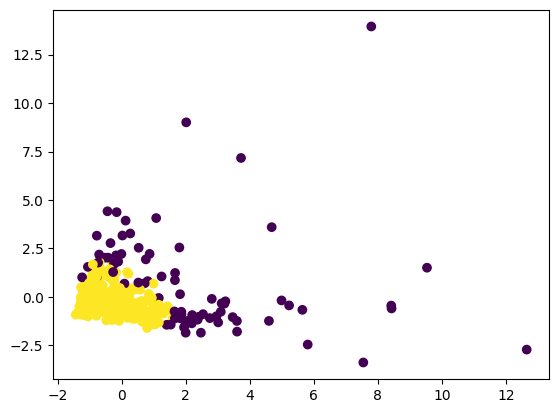

In [67]:
plt.scatter(pca_mat[:,0], pca_mat[:,1], c=dbs_cluster)

# 1.with varying density in region with low density, its classified as outlier so again we have to run DBSCAN to classify region of low density.
# 2. Its hard to determine 2 parameters of DBSCAN

In [68]:
dbs_cluster.sum()

-78